<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Compute_EOF_ElNino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basemap
!pip install eofs
!pip install cartopy

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# Corrected URL pointing to the actual NetCDF file
# url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/noaa.oisst.v2/sst.oisst.mon.mean.1982.nc'
url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/noaa.oisst.v2/sst.mnmean.nc'
!wget $url


--2025-05-08 07:31:34--  https://psl.noaa.gov/thredds/fileServer/Datasets/noaa.oisst.v2/sst.mnmean.nc
Resolving psl.noaa.gov (psl.noaa.gov)... 140.172.38.12
Connecting to psl.noaa.gov (psl.noaa.gov)|140.172.38.12|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 64038940 (61M) [application/x-netcdf]
Saving to: ‘sst.mnmean.nc’

sst.mnmean.nc       100%[===================>]  61.07M  3.37MB/s    in 19s     

2025-05-08 07:31:54 (3.14 MB/s) - ‘sst.mnmean.nc’ saved [64038940/64038940]



In [4]:
df = xr.open_dataset('sst.mnmean.nc')
df

<xarray.Dataset> Size: 128MB
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 128MB ...
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

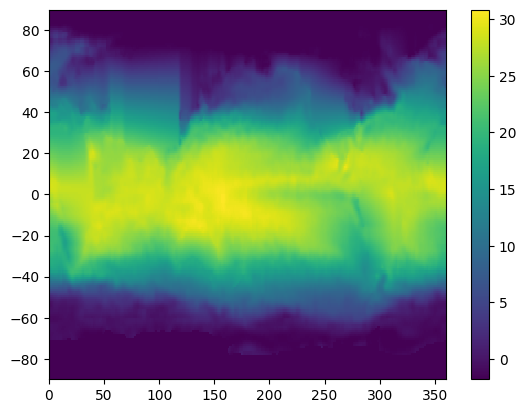

In [5]:
plt.pcolormesh(df.lon,df.lat,df.sst[0,:,:])
plt.colorbar()
plt.show()

In [6]:
df = df.sel(time=slice('1982-01-01','2022-12-31'))
df

<xarray.Dataset> Size: 128MB
Dimensions:    (lat: 180, lon: 360, time: 492, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2022-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 128MB ...
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

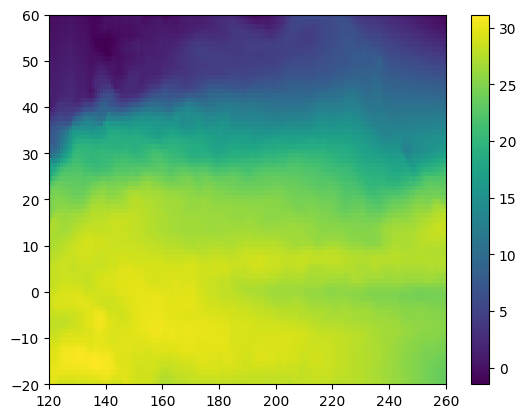

In [8]:
df2 = df.sel(lon=slice(120,260),lat=slice(60,-20))
plt.pcolormesh(df2.lon,df2.lat,df2.sst[0,:,:])
plt.colorbar()
plt.show()

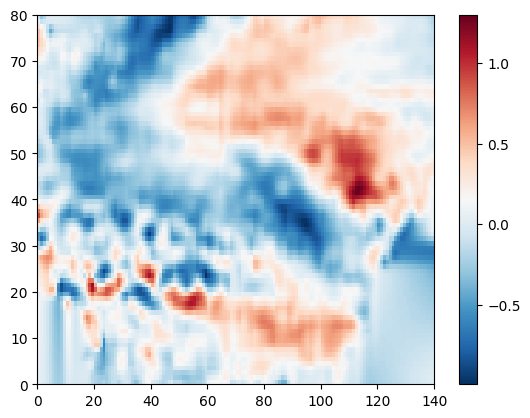

In [13]:
ds_season = df2.where(df2['time.season'] == 'DJF').groupby('time.year').mean('time')
ds_season
sst = ds_season - ds_season.sst.mean('year')
plt.pcolormesh(sst.sst[12,:,:],cmap='RdBu_r');plt.colorbar()

In [14]:
# convert to data_array
sst = sst.sst
sst

<xarray.DataArray 'sst' (year: 41, lat: 80, lon: 140)> Size: 2MB
array([[[ 0.16642272,  0.1592683 ,  0.0602439 , ..., -0.13934955,
         -0.14788622, -0.15504071],
        [ 0.17845535,  0.1745528 ,  0.06398368, ..., -0.13512194,
         -0.14487803, -0.1554471 ],
        [ 0.19284552,  0.1903252 ,  0.07325196, ..., -0.1223577 ,
         -0.13081302, -0.14032519],
        ...,
        [ 0.26943398,  0.2923603 ,  0.33171082, ...,  0.28398323,
          0.29561234,  0.2942295 ],
        [ 0.10000038,  0.08609581,  0.11853409, ...,  0.2034111 ,
          0.2253685 ,  0.23715591],
        [-0.06048203, -0.09902191, -0.00723839, ...,  0.11967278,
          0.13682747,  0.15804672]],

       [[ 0.2564227 ,  0.29593503,  0.25024393, ..., -0.13601619,
         -0.14121956, -0.14837399],
        [ 0.275122  ,  0.31455278,  0.27065027, ..., -0.12845527,
         -0.13154471, -0.1454471 ],
        [ 0.29951227,  0.33365846,  0.2899186 , ..., -0.10235772,
         -0.11747965, -0.12699187],
...
        [ 0.7794323 ,  0.77902603,  0.7850418 , ..., -1.2960186 ,
         -1.301054  , -1.3024387 ],
        [ 0.81666565,  0.8327637 ,  0.7985344 , ..., -1.3332539 ,
         -1.341299  , -1.3295116 ],
        [ 0.84284973,  0.88097763,  0.79942894, ..., -1.3369961 ,
         -1.3398361 , -1.3252869 ]],

       [[-0.04691061, -0.074065  , -0.02308941, ...,  0.17065044,
          0.1654471 ,  0.15495926],
        [-0.05487797, -0.07878056, -0.01934969, ...,  0.19487807,
          0.18512194,  0.18788622],
        [-0.05715448, -0.0830082 , -0.026748  , ...,  0.20764232,
          0.20585367,  0.19634148],
        ...,
        [ 0.3127632 ,  0.36569405,  0.4083767 , ..., -0.79268456,
         -0.7777214 , -0.7591038 ],
        [ 0.39333344,  0.44609642,  0.42520332, ..., -0.7599201 ,
         -0.7279644 , -0.70617867],
        [ 0.44285202,  0.49764252,  0.43609428, ..., -0.73365974,
         -0.69317055, -0.6652832 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 320B 59.5 58.5 57.5 56.5 ... -16.5 -17.5 -18.5 -19.5
  * lon      (lon) float32 560B 120.5 121.5 122.5 123.5 ... 257.5 258.5 259.5
  * year     (year) int64 328B 1982 1983 1984 1985 1986 ... 2019 2020 2021 2022

In [15]:
# rename time variable to be consistent with the EOFS package
sst = sst.rename({'year':'time'})

In [16]:
from eofs.xarray import Eof

In [20]:
coslat = np.cos(np.deg2rad(sst.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(-sst, weights=wgts)


In [25]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)


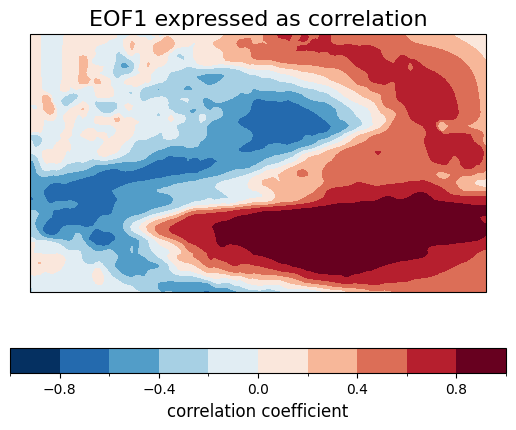

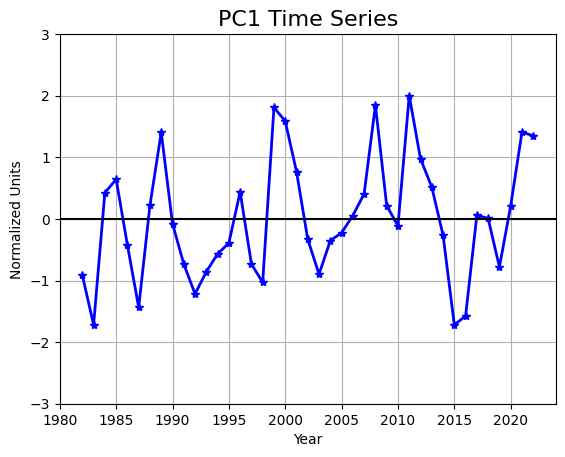

In [26]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b',marker='*', linewidth=2)
plt.grid()
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

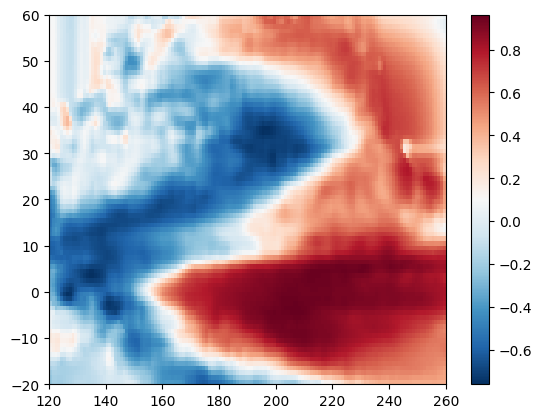

In [29]:
plt.pcolormesh(sst.lon,sst.lat,eof1[0,:,:],cmap='RdBu_r');plt.colorbar()

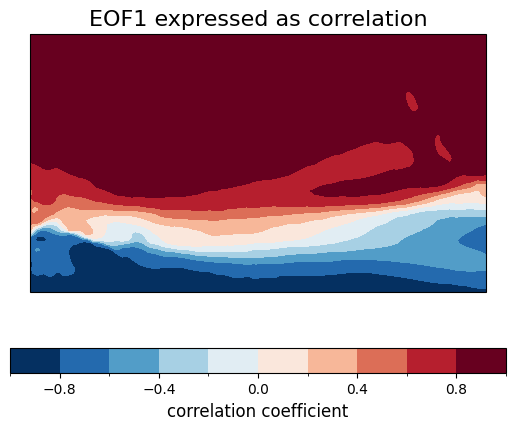

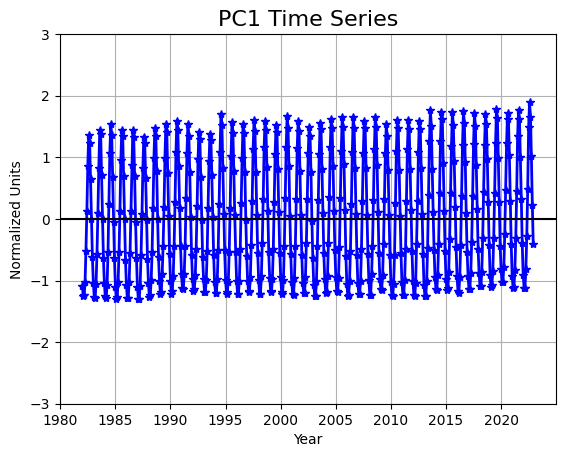

In [40]:
#ds_season = df2.where(df2['time.season'] == 'DJF').groupby('time.year').mean('time')
ds_season = df2
sst = ds_season
# convert to data_array
sst = sst.sst
coslat = np.cos(np.deg2rad(sst.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=2)
pc1 = solver.pcs(npcs=2, pcscaling=1)
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b',marker='*', linewidth=2)
plt.grid()
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

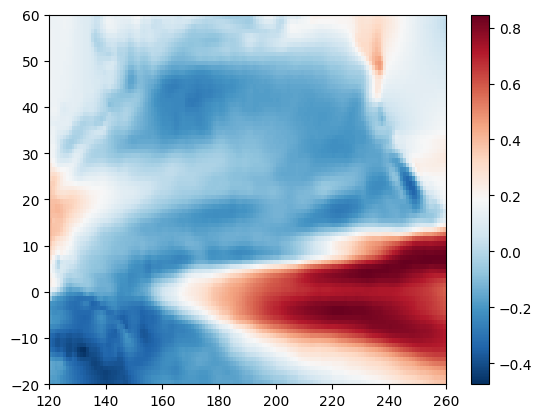

In [41]:
plt.pcolormesh(sst.lon,sst.lat,eof1[1,:,:],cmap='RdBu_r');plt.colorbar()

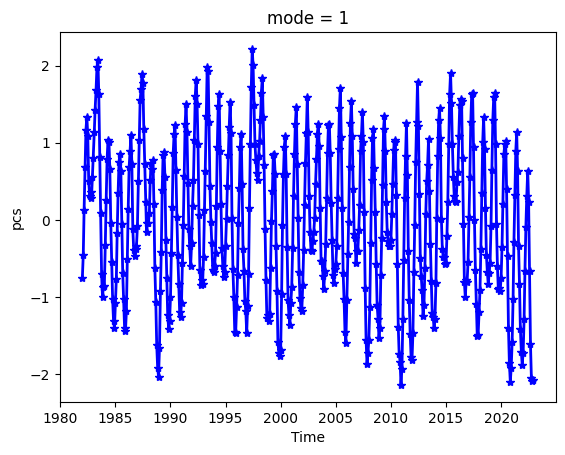

In [42]:
pc1[:, 1].plot(color='b',marker='*', linewidth=2)